<a href="https://colab.research.google.com/github/cipB14/Questify/blob/patch1/ML_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOGISTIC / LINEAR REGRESSION

---

### ✅ **Linear Regression Algorithm**

1. **Initialize Weights**:  
   - Start by initializing the weights (**\(\beta_0, \beta_1, \beta_2, ..., \beta_n\)**) randomly or to zero.

2. **Compute Predictions**:  
   - For each input feature \(x_1, x_2, ..., x_n\), compute the predicted value \(y\) using the formula:
     \[
     \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
     \]

3. **Calculate the Error**:  
   - Calculate the error (or residuals) for each data point:
     \[
     e_i = y_i - \hat{y}_i
     \]
     Where \(y_i\) is the actual value and \(\hat{y}_i\) is the predicted value.

4. **Compute the Cost Function (MSE)**:  
   - Calculate the Mean Squared Error (MSE) to measure the performance of the model:
     \[
     MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
     \]
     Where \(m\) is the number of data points.

5. **Update Weights**:  
   - Use **Gradient Descent** to update the weights and minimize the MSE:
     \[
     \beta_j = \beta_j - \alpha \frac{\partial MSE}{\partial \beta_j}
     \]
     Where \(\alpha\) is the learning rate and \(\frac{\partial MSE}{\partial \beta_j}\) is the partial derivative of the MSE with respect to weight \(\beta_j\).

6. **Repeat**:  
   - Repeat steps 2-5 for a fixed number of iterations or until convergence (when the weights stop changing significantly).

---

### ✅ **Logistic Regression Algorithm**

1. **Initialize Weights**:  
   - Start by initializing the weights (**\(\beta_0, \beta_1, \beta_2, ..., \beta_n\)**) randomly or to zero.

2. **Compute Predictions (Sigmoid Function)**:  
   - For each input feature \(x_1, x_2, ..., x_n\), compute the linear combination:
     \[
     z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
     \]
     - Then apply the **sigmoid function** to map the output to a probability:
     \[
     p = \frac{1}{1 + e^{-z}}
     \]

3. **Calculate the Error**:  
   - For each data point, calculate the error between the actual label \(y_i\) (0 or 1) and predicted probability \(p_i\).

4. **Compute the Cost Function (Log-Loss or Cross-Entropy)**:  
   - The cost function used in logistic regression is **log-loss** or **cross-entropy**:
     \[
     J(\beta) = -\frac{1}{m} \sum_{i=1}^{m} [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)]
     \]
     Where \(p_i\) is the predicted probability of the positive class.

5. **Update Weights**:  
   - Use **Gradient Descent** to update the weights by minimizing the cost function:
     \[
     \beta_j = \beta_j - \alpha \frac{\partial J(\beta)}{\partial \beta_j}
     \]
     Where \(\alpha\) is the learning rate and \(\frac{\partial J(\beta)}{\partial \beta_j}\) is the partial derivative of the cost function with respect to weight \(\beta_j\).

6. **Repeat**:  
   - Repeat steps 2-5 for a fixed number of iterations or until convergence (when the weights stop changing significantly).

---

### **Key Points for Both Algorithms:**

- **Linear Regression**: Used for predicting continuous values. The goal is to minimize the **Mean Squared Error (MSE)**.
- **Logistic Regression**: Used for binary classification. The goal is to minimize **log-loss** (or **cross-entropy**) using the sigmoid function.




[0.14285714 0.28571429 0.42857143 0.57142857 0.71428571 0.85714286
 1.         1.14285714 1.28571429]
[0.09033582 0.21803502 0.43911192 0.6873201  0.86056701 0.94544233
 0.97986158 0.99273337 0.99739978]
Mean Squared Error (Linear Regression): 0.26530612244897933
Accuracy (Logistic Regression): 0.5


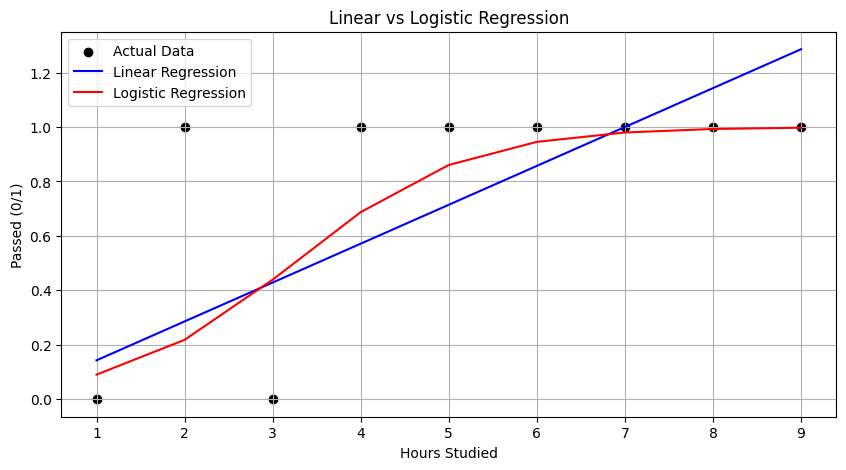

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# 1. Data
data = {
    'Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Passed': [0, 1, 0, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
X = df[['Hours']]
y = df['Passed']

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred_linear = model1.predict(X)
print(y_pred_linear) # Predicted values

# 4. Logistic Regression
model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred_logistic = model2.predict_proba(X)[:,1]
print(y_pred_logistic) # Probability of class 1

# 5. Metrics
mse = mean_squared_error(y_test, model1.predict(X_test))
accuracy = accuracy_score(y_test, model2.predict(X_test))

print("Mean Squared Error (Linear Regression):", mse)
print("Accuracy (Logistic Regression):", accuracy)

# 6. Visualization
plt.figure(figsize=(10, 5))

# Scatter original points
plt.scatter(X, y, color='black', label='Actual Data')

# Linear regression line (reshape X to a 1D array for plotting)
plt.plot(X, y_pred_linear, color='blue', label='Linear Regression')

# Logistic regression curve
plt.plot(X, y_pred_logistic, color='red', label='Logistic Regression')

plt.xlabel('Hours Studied')
plt.ylabel('Passed (0/1)')
plt.title('Linear vs Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


MLP WITH BACK PROPOGATION


---

### ✅ **MLP (Multilayer Perceptron) Algorithm - 5 Simple Steps**

1. **Initialize Weights Randomly**  
   - Randomly initialize the weights between neurons to small random values.

2. **Feed Data Through the Network**  
   - Input data is passed through the layers of the network:  
     - **Input Layer** → **Hidden Layer(s)** → **Output Layer**.  
   - Each neuron computes a weighted sum of inputs, applies an activation function (like ReLU or Sigmoid), and passes the result to the next layer.

3. **Calculate Loss/Error**  
   - Calculate the error between predicted output and actual output using a loss function (e.g., **cross-entropy loss** for classification).

4. **Backpropagate Error**  
   - Compute the gradient (error derivative) of the loss function with respect to each weight.  
   - Update the weights to minimize the error (using gradient descent).

5. **Repeat Until Convergence**  
   - Repeat the process (steps 2-4) for multiple epochs, adjusting the weights each time, until the model's performance stops improving or a maximum number of epochs is reached.

---


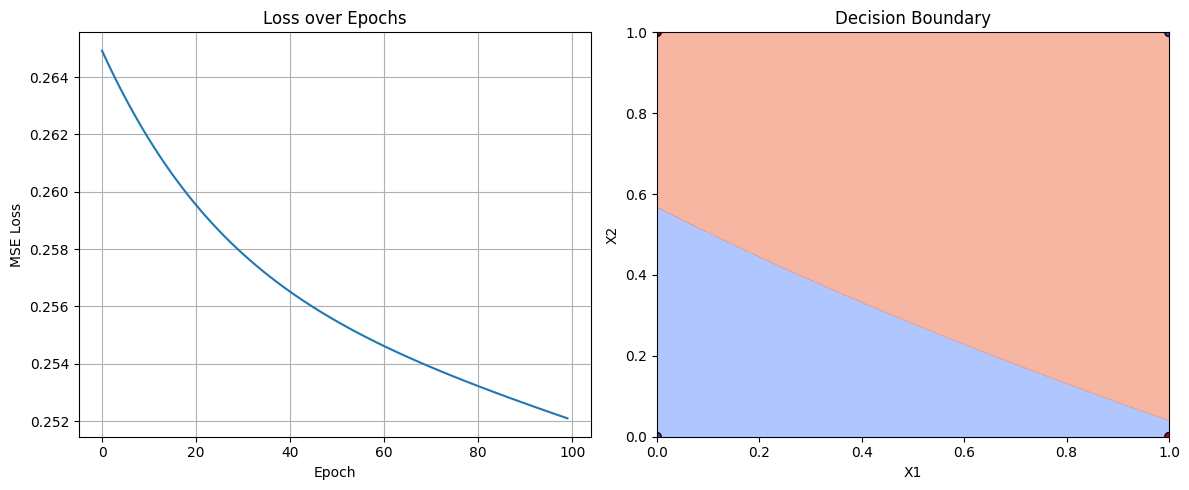

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 1. XOR Inputs and Outputs
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# 2. Init Weights
np.random.seed(1)
W1 = np.random.randn(2, 4)
W2 = np.random.randn(4, 1)

# 3. Activation functions
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return x * (1 - x)

losses = []

# 4. Train Loop
for epoch in range(100):
    Z1 = np.dot(X, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    loss = np.mean((y - A2) ** 2)
    losses.append(loss)

    error = y - A2
    dZ2 = error * sigmoid_deriv(A2)
    dW2 = np.dot(A1.T, dZ2)

    dZ1 = np.dot(dZ2, W2.T) * sigmoid_deriv(A1)
    dW1 = np.dot(X.T, dZ1)

    W1 += 0.1 * dW1
    W2 += 0.1 * dW2

# 5. Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)

# 6. Decision Boundary Plot
def predict(x):
    a1 = sigmoid(np.dot(x, W1))
    a2 = sigmoid(np.dot(a1, W2))
    return a2

# Create grid
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid)
Z = Z.reshape(xx.shape)

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="coolwarm", alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap="coolwarm")
plt.title("Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")

plt.tight_layout()
plt.show()


DECISION TREE


### ✅ **Decision Tree Classifier Algorithm (5 Key Points)**

1. **Select the Best Feature to Split**  
   - Choose the feature that best splits the data based on a certain criterion (e.g., **Gini Impurity** or **Information Gain** for classification).
   - This step determines the root of the tree and subsequent branches.

2. **Split the Data**  
   - Divide the dataset into subsets based on the selected feature.
   - This creates branches of the tree, where each branch represents one possible value of the selected feature.

3. **Recursively Split the Data**  
   - For each new subset, repeat steps 1 and 2. Continue to split the data recursively until a stopping condition is met (e.g., maximum tree depth, minimum samples in a node, or no further improvements).

4. **Assign a Label to Each Leaf Node**  
   - Once the tree is built, assign a label (class) to each leaf node. The label is typically the most frequent class in that subset of data.

5. **Classify New Data**  
   - To classify a new instance, follow the path from the root to a leaf node, choosing branches based on the features of the instance. The label of the leaf node is the predicted class.

---


Accuracy: 0.5


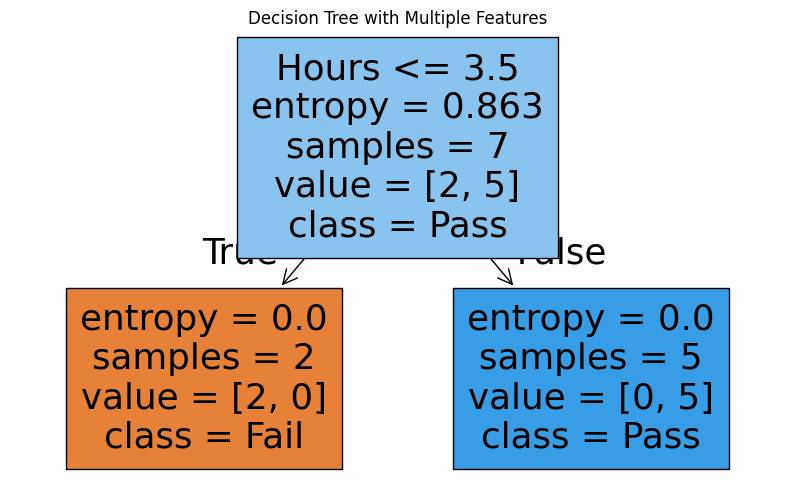

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Sample data with more features
data = {
    'Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Age': [18, 19, 20, 21, 22, 23, 24, 25, 26],
    'Salary': [1000, 1200, 1100, 1400, 1500, 1600, 1700, 1800, 1900],
    'Passed': [0, 1, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# Features and target
X = df[['Hours', 'Age', 'Salary']]
y = df['Passed']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree
model = DecisionTreeClassifier()
#for ID3 model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

# Predict and check accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=['Hours', 'Age', 'Salary'], class_names=['Fail', 'Pass'], filled=True)
plt.title("Decision Tree with Multiple Features")
plt.show()


LDA and PCA


---

### ✅ **PCA (Principal Component Analysis)** - 5 Key Points

1. **Standardize the Data**  
   - Center the data by subtracting the mean of each feature.
   - Optionally, scale features to have unit variance.

2. **Calculate the Covariance Matrix**  
   - Compute the covariance matrix to capture relationships between features.

3. **Compute Eigenvalues and Eigenvectors**  
   - Find the eigenvalues and eigenvectors of the covariance matrix. These represent the directions (principal components) with the most variance.

4. **Select Top k Eigenvectors**  
   - Sort the eigenvalues and select the top `k` eigenvectors to reduce dimensionality.

5. **Project Data onto the New Feature Space**  
   - Project the original data onto the new `k` principal components, reducing dimensionality while preserving the most variance.

---

### ✅ **LDA (Linear Discriminant Analysis)** - 5 Key Points

1. **Standardize the Data**  
   - Center the data by subtracting the mean of each feature (and optionally scale if necessary).

2. **Compute Class Mean Vectors**  
   - Calculate the mean of each class in the dataset to understand the centroids.

3. **Calculate Scatter Matrices**  
   - Compute the **within-class scatter matrix** (variance within each class) and **between-class scatter matrix** (variance between class means).

4. **Compute Eigenvalues and Eigenvectors**  
   - Find the eigenvalues and eigenvectors from the matrix `SW^(-1) * SB` to identify directions that maximize class separability.

5. **Project Data onto New Feature Space**  
   - Use the top `k` eigenvectors (typically `k = number of classes - 1`) to project data into a lower-dimensional space, improving class separability.

---



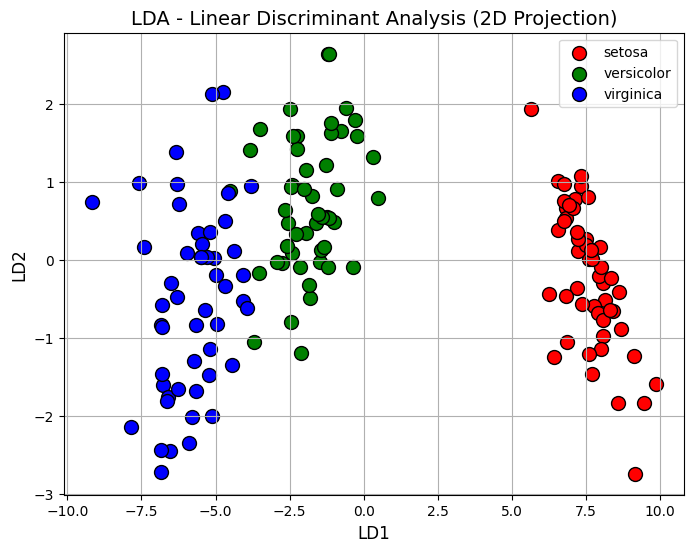

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load dataset
iris = load_iris()
X = iris.data          # Features: 4 columns (sepal & petal length/width)
y = iris.target        # Target: 0, 1, 2 (class labels)
labels = iris.target_names  # ['setosa', 'versicolor', 'virginica']

# Step 2: Apply LDA to reduce dimensions
lda = LDA(n_components=2)  # Project data to 2D
X_lda = lda.fit_transform(X, y)

# Step 3: Create a DataFrame for easy plotting
df_lda = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
df_lda['class'] = y

# Step 4: Plot with class labels
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for class_index, class_label in enumerate(labels):
    plt.scatter(
        df_lda[df_lda['class'] == class_index]['LD1'],
        df_lda[df_lda['class'] == class_index]['LD2'],
        label=class_label,
        color=colors[class_index],
        edgecolor='k',
        s=100
    )

plt.title("LDA - Linear Discriminant Analysis (2D Projection)", fontsize=14)
plt.xlabel("LD1", fontsize=12)
plt.ylabel("LD2", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


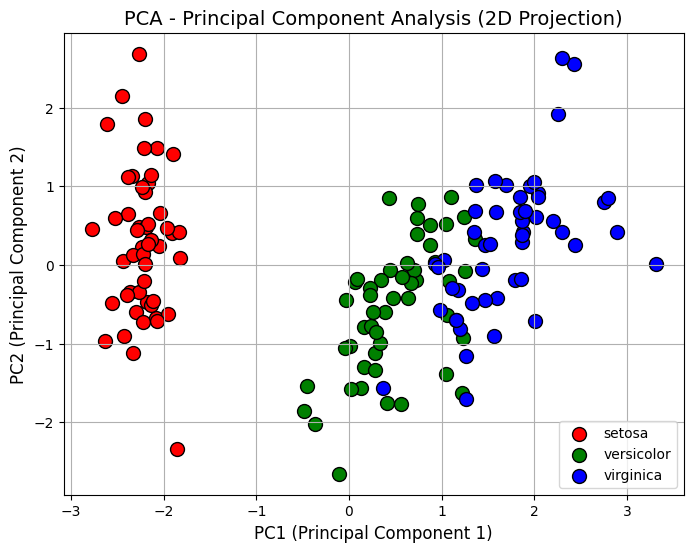

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load dataset
iris = load_iris()
X = iris.data           # Features: 4-dimensional
y = iris.target         # Target classes: 0, 1, 2
labels = iris.target_names  # ['setosa', 'versicolor', 'virginica']

# Step 2: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Create DataFrame for easy plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['class'] = y
# Step 5: Visualize with colors for each class
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for class_index, class_label in enumerate(labels):
    plt.scatter(
        df_pca[df_pca['class'] == class_index]['PC1'],
        df_pca[df_pca['class'] == class_index]['PC2'],
        label=class_label,
        color=colors[class_index],
        edgecolor='k',
        s=100
    )

plt.title("PCA - Principal Component Analysis (2D Projection)", fontsize=14)
plt.xlabel("PC1 (Principal Component 1)", fontsize=12)
plt.ylabel("PC2 (Principal Component 2)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()




### ✅ Genetic Algorithm: 8-Step Procedure

1. **Initialize the Population**  
   - Randomly generate a set of chromosomes (individual solutions).  
   - Each chromosome is typically a string of binary digits (e.g., `'1010'` for a 4-bit string).

2. **Evaluate Fitness**  
   - Calculate the fitness of each chromosome using a predefined fitness function.  
   - The function reflects how "good" or "fit" each solution is (e.g., number of 1s or decimal value).

3. **Select Parents**  
   - Choose two chromosomes (parents) from the population based on their fitness.  
   - Better-fit chromosomes have a higher chance to be selected. Selection methods include:
     - Random selection (simple)
     - Roulette wheel (probabilistic)
     - Tournament selection (choose best of random few)

4. **Perform Crossover (Recombination)**  
   - Combine the two parents to produce offspring (children).
   - Use **single-point crossover**: cut at a point and swap parts.
     - Example: `Parent1 = 1010`, `Parent2 = 1100` → `Child1 = 1010`, `Child2 = 1100`

5. **Apply Mutation**  
   - Introduce random changes to the offspring to maintain diversity.
   - Flip a bit at a random index with a small probability (e.g., 0.1 or 10%).

6. **Create New Population**  
   - Replace the old population with the newly generated offspring (can use full replacement or partial with elitism).

7. **Check Stopping Criteria**  
   - Repeat steps 2 to 6 for a fixed number of generations **or** until the **best fitness value** is found (early stopping).

8. **Return Best Solution**  
   - After termination, output the chromosome with the **highest fitness** as the final solution.

---



In [19]:
import random

# Parameters
POP_SIZE = 6
CHROMOSOME_LENGTH = 4
GENERATIONS = 100
MUTATION_RATE = 0.1

# Fitness Function: Count of 1's (can use int(chrom, 2) for decimal value)
def fitness(chromosome):
    return chromosome.count('1')

# Generate random 4-bit chromosome
def random_chromosome():
    return ''.join(random.choice('01') for _ in range(CHROMOSOME_LENGTH))

# Selection: Random
def selection(population):
    return random.choice(population)

# Crossover: Single-point
def crossover(parent1, parent2):
    point = random.randint(1, CHROMOSOME_LENGTH - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Mutation: Flip 1 bit
def mutate(chromosome):
    if random.random() < MUTATION_RATE:
        index = random.randint(0, CHROMOSOME_LENGTH - 1)
        flipped = '1' if chromosome[index] == '0' else '0'
        chromosome = chromosome[:index] + flipped + chromosome[index+1:]
    return chromosome

# Initialize population
population = [random_chromosome() for _ in range(POP_SIZE)]

# Run Genetic Algorithm
for gen in range(GENERATIONS):
    new_population = []

    # Generate next population
    while len(new_population) < POP_SIZE:
        parent1 = selection(population)
        parent2 = selection(population)
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])

    # Trim extra if population exceeded
    population = new_population[:POP_SIZE]

    # Evaluate fitness and print best
    fitness_scores = [fitness(chrom) for chrom in population]
    best = max(zip(population, fitness_scores), key=lambda x: x[1])
    print(f"Generation {gen+1}: Best = {best[0]} (Fitness = {best[1]})")


Generation 1: Best = 1110 (Fitness = 3)
Generation 2: Best = 1011 (Fitness = 3)
Generation 3: Best = 1110 (Fitness = 3)
Generation 4: Best = 1011 (Fitness = 3)
Generation 5: Best = 1110 (Fitness = 3)
Generation 6: Best = 1011 (Fitness = 3)
Generation 7: Best = 1110 (Fitness = 3)
Generation 8: Best = 1011 (Fitness = 3)
Generation 9: Best = 1011 (Fitness = 3)
Generation 10: Best = 1011 (Fitness = 3)
Generation 11: Best = 1011 (Fitness = 3)
Generation 12: Best = 1111 (Fitness = 4)
Generation 13: Best = 1111 (Fitness = 4)
Generation 14: Best = 1111 (Fitness = 4)
Generation 15: Best = 0111 (Fitness = 3)
Generation 16: Best = 1111 (Fitness = 4)
Generation 17: Best = 0111 (Fitness = 3)
Generation 18: Best = 1111 (Fitness = 4)
Generation 19: Best = 0111 (Fitness = 3)
Generation 20: Best = 1110 (Fitness = 3)
Generation 21: Best = 1110 (Fitness = 3)
Generation 22: Best = 1110 (Fitness = 3)
Generation 23: Best = 1110 (Fitness = 3)
Generation 24: Best = 1110 (Fitness = 3)
Generation 25: Best = 111

In [21]:
import random

# Parameters
POP_SIZE = 6
CHROMOSOME_LENGTH = 4
GENERATIONS = 50
MUTATION_RATE = 0.1
MAX_FITNESS = 15  # Max value for 4-bit binary

# Fitness: Decimal representation of binary string
def fitness(chromosome):
    return int(chromosome, 2)

# Generate random chromosome
def random_chromosome():
    return ''.join(random.choice('01') for _ in range(CHROMOSOME_LENGTH))

# Random selection
def selection(population):
    return random.choice(population)

# Single-point crossover
def crossover(parent1, parent2):
    point = random.randint(1, CHROMOSOME_LENGTH - 1)
    return (
        parent1[:point] + parent2[point:],
        parent2[:point] + parent1[point:]
    )

# Mutation: Flip a single bit
def mutate(chromosome):
    if random.random() < MUTATION_RATE:
        idx = random.randint(0, CHROMOSOME_LENGTH - 1)
        flipped = '1' if chromosome[idx] == '0' else '0'
        chromosome = chromosome[:idx] + flipped + chromosome[idx+1:]
    return chromosome

# Initial population
population = [random_chromosome() for _ in range(POP_SIZE)]

# Evolution process
for gen in range(GENERATIONS):
    new_population = []

    while len(new_population) < POP_SIZE:
        p1, p2 = selection(population), selection(population)
        c1, c2 = crossover(p1, p2)
        new_population.extend([mutate(c1), mutate(c2)])

    population = new_population[:POP_SIZE]

    # Evaluate fitness
    fitness_scores = [fitness(ch) for ch in population]
    best = max(zip(population, fitness_scores), key=lambda x: x[1])

    print(f"Generation {gen+1}: Best = {best[0]} (Decimal = {best[1]})")

    if best[1] == MAX_FITNESS:
        print("Maximum fitness achieved. Stopping early.")
        break


Generation 1: Best = 1110 (Decimal = 14)
Generation 2: Best = 1110 (Decimal = 14)
Generation 3: Best = 1111 (Decimal = 15)
Maximum fitness achieved. Stopping early.
